In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
# Load dataset
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [13]:
# Feature engineering
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath']
df = df[['GrLivArea', 'BedroomAbvGr', 'TotalBath', 'SalePrice']].dropna()

In [14]:
# Feature matrix and target
X = df[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
y = df['SalePrice']


In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [17]:
# Metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


In [18]:
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

RMSE: 53371.56
R² Score: 0.6286
Model Coefficients:
GrLivArea: 100.64
BedroomAbvGr: -26645.53
TotalBath: 27083.21


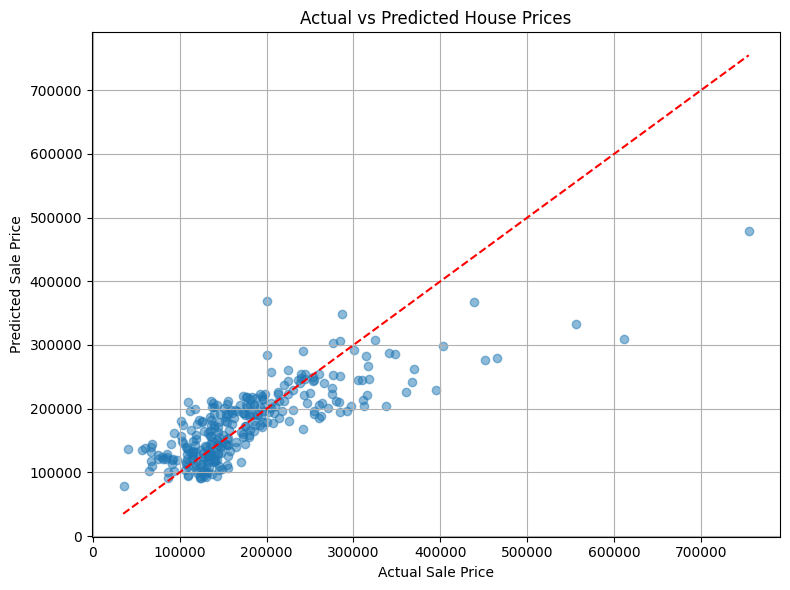

In [19]:
# Plot 1: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


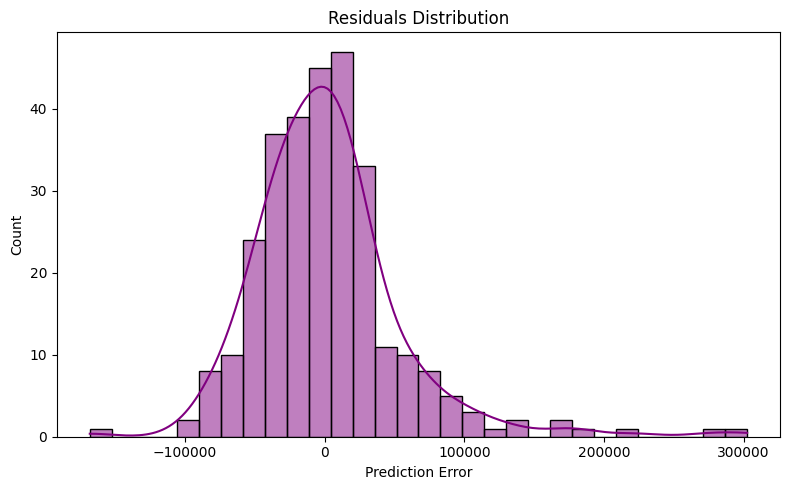

In [22]:
# Plot 2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()

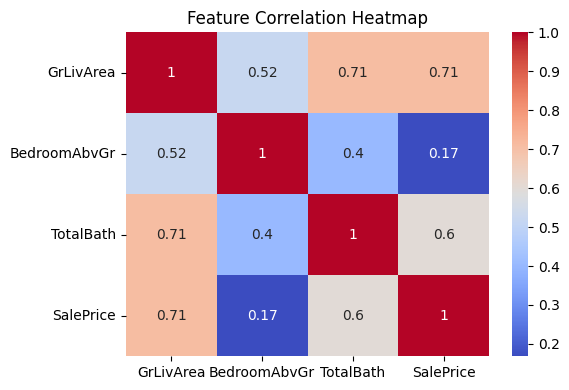

In [21]:
# Plot 3: Feature Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

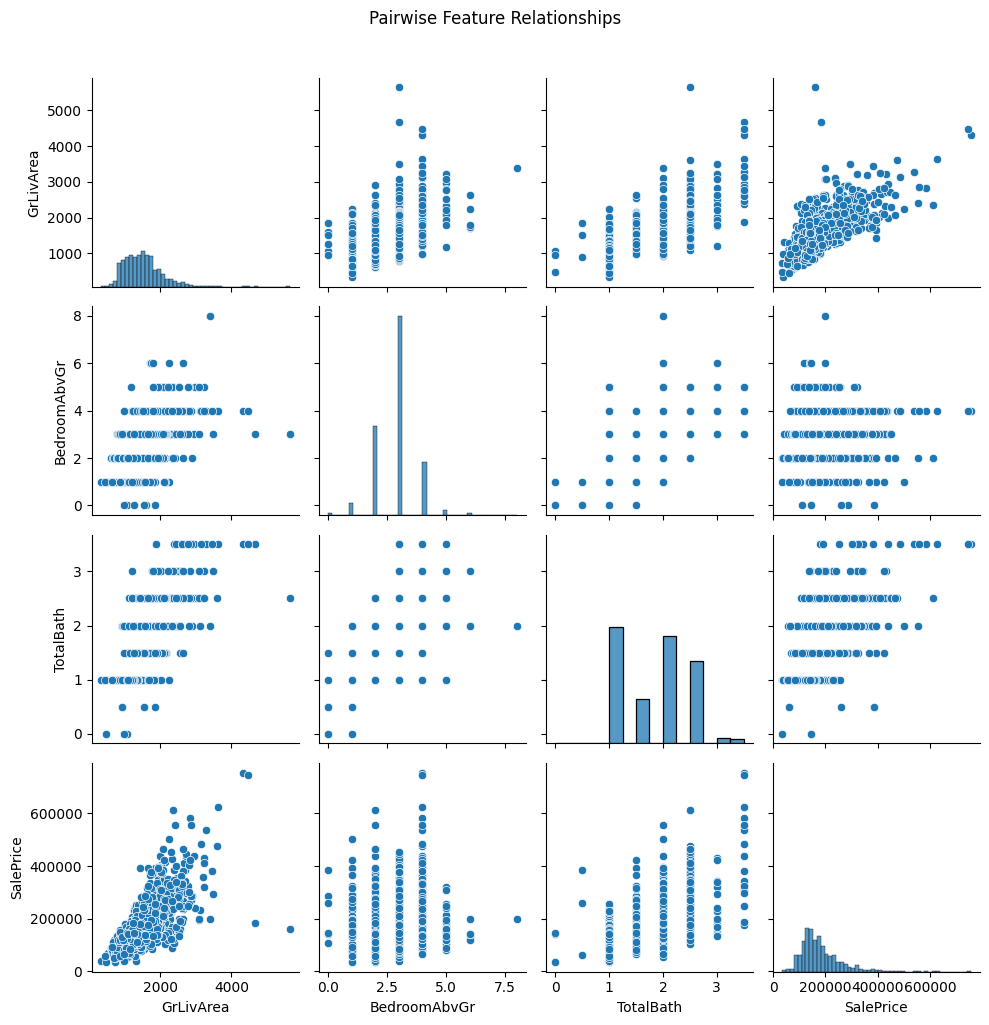

In [23]:
# Plot 4: Feature vs Target (SalePrice) – Pairplots
sns.pairplot(df[['GrLivArea', 'BedroomAbvGr', 'TotalBath', 'SalePrice']])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.tight_layout()
plt.show()


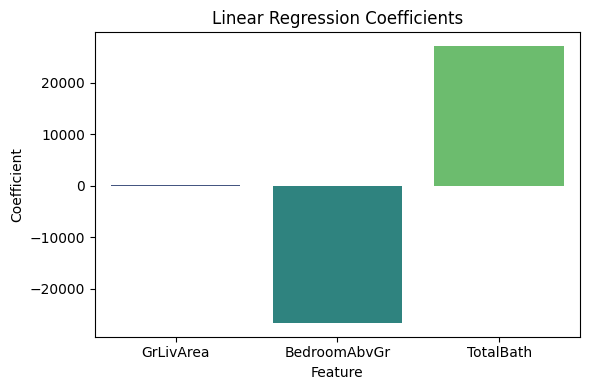

In [24]:
# Plot 5: Coefficients Bar Plot
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
plt.figure(figsize=(6,4))
sns.barplot(data=coef_df, x='Feature', y='Coefficient', palette='viridis')
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.show()

# Advance Approach


📘 Linear Regression
RMSE: 0.1628
R²: 0.8580
MAE: 0.1012

📘 Lasso Regression
RMSE: 0.1532
R²: 0.8742
MAE: 0.1050

📘 SVR
RMSE: 0.2091
R²: 0.7657
MAE: 0.1450

📘 Random Forest
RMSE: 0.1453
R²: 0.8869
MAE: 0.0967

📘 XGBoost
RMSE: 0.1436
R²: 0.8895
MAE: 0.0938

🛠 Tuned XGBoost
RMSE: 0.1362
R²: 0.9005
MAE: 0.0900


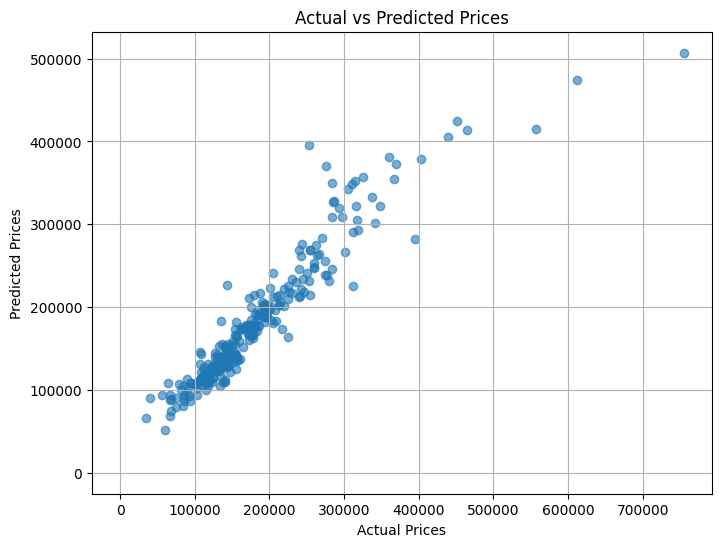

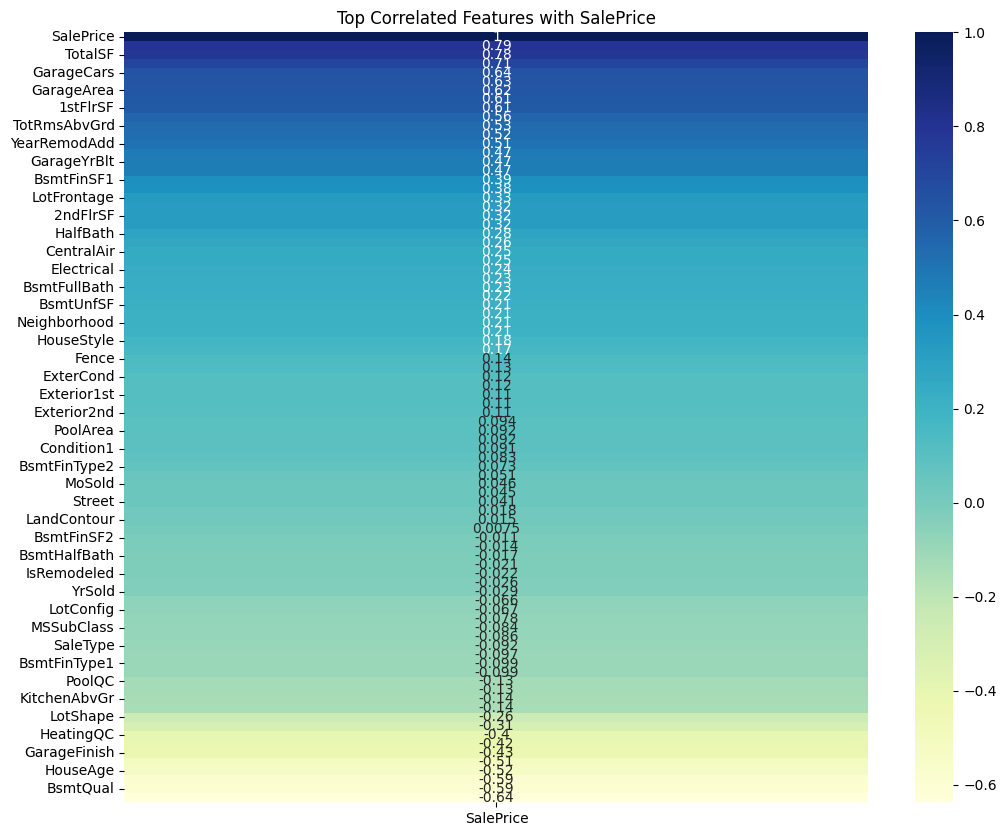

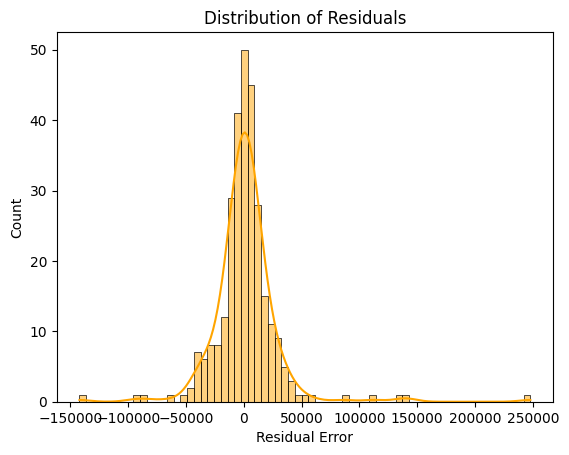

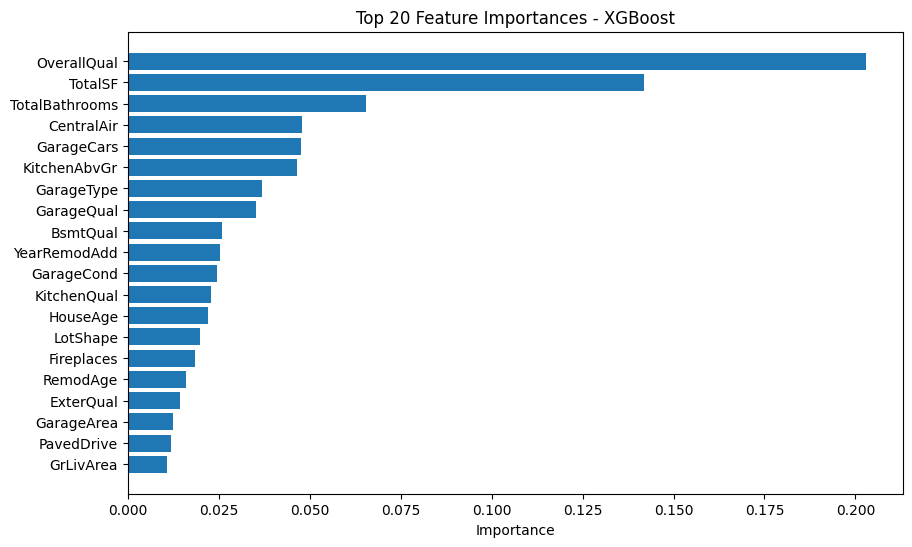

✅ Submission file saved: submission_tuned.csv


In [25]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# 📂 Load Data
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Merge for preprocessing
train['TrainFlag'] = 1
test['TrainFlag'] = 0
full_data = pd.concat([train, test], axis=0)

# 🛠 Feature Engineering
full_data['TotalSF'] = full_data['TotalBsmtSF'] + full_data['1stFlrSF'] + full_data['2ndFlrSF']
full_data['TotalBathrooms'] = full_data['FullBath'] + (0.5 * full_data['HalfBath']) + full_data['BsmtFullBath'] + (0.5 * full_data['BsmtHalfBath'])
full_data['IsRemodeled'] = (full_data['YearBuilt'] != full_data['YearRemodAdd']).astype(int)
full_data['HasPool'] = (full_data['PoolArea'] > 0).astype(int)
full_data['HouseAge'] = full_data['YrSold'] - full_data['YearBuilt']
full_data['RemodAge'] = full_data['YrSold'] - full_data['YearRemodAdd']

# 🔧 Handling Missing Values
for col in full_data.select_dtypes(include=['object']).columns:
    full_data[col] = full_data[col].fillna('None')
for col in full_data.select_dtypes(exclude=['object']).columns:
    full_data[col] = full_data[col].fillna(full_data[col].median())

# 🔤 Label Encoding for categorical columns
cat_cols = full_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    full_data[col] = le.fit_transform(full_data[col])

# 🎯 Separate Train/Test
train_cleaned = full_data[full_data['TrainFlag'] == 1].drop(columns=['TrainFlag', 'Id'])
test_cleaned = full_data[full_data['TrainFlag'] == 0].drop(columns=['TrainFlag', 'SalePrice'])

# Separate features and target
X = train_cleaned.drop(columns=['SalePrice'])
y = np.log1p(train_cleaned['SalePrice'])  # log-transform target

# 📚 Train/Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.001),
    "SVR": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
}

# 📊 Train and Evaluate All Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    print(f"\n📘 {name}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_valid, y_pred)):.4f}")
    print(f"R²: {r2_score(y_valid, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_valid, y_pred):.4f}")

# ✅ Hyperparameter Tuning: XGBoost
xgb_model = xgb.XGBRegressor()
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
grid = GridSearchCV(xgb_model, params, cv=3, scoring='neg_root_mean_squared_error', verbose=0)
grid.fit(X_train, y_train)
best_tuned = grid.best_estimator_

# Evaluate tuned model
y_pred_tuned = best_tuned.predict(X_valid)
print("\n🛠 Tuned XGBoost")
print(f"RMSE: {np.sqrt(mean_squared_error(y_valid, y_pred_tuned)):.4f}")
print(f"R²: {r2_score(y_valid, y_pred_tuned):.4f}")
print(f"MAE: {mean_absolute_error(y_valid, y_pred_tuned):.4f}")

# 🖼️ Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(np.expm1(y_valid), np.expm1(y_pred_tuned), alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

# 🔥 Heatmap of Correlations
plt.figure(figsize=(12, 10))
sns.heatmap(train_cleaned.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='YlGnBu')
plt.title("Top Correlated Features with SalePrice")
plt.show()

# 🎯 Residuals
residuals = np.expm1(y_valid) - np.expm1(y_pred_tuned)
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribution of Residuals")
plt.xlabel("Residual Error")
plt.show()

# ⭐ Feature Importance
importances = best_tuned.feature_importances_
indices = np.argsort(importances)[-20:]
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances - XGBoost")
plt.show()

# 📤 Submission
test_preds = best_tuned.predict(test_cleaned.drop(columns=['Id']))
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': np.expm1(test_preds)
})
submission.to_csv("submission_tuned.csv", index=False)
print("✅ Submission file saved: submission_tuned.csv")
